In [2]:
# Standard libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from ipywidgets import IntProgress
from IPython.display import display

# Append base directory
import os,sys,inspect
rootname = "pub-2020-exploratory-analysis"
thispath = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
rootpath = os.path.join(thispath[:thispath.index(rootname)], rootname)
sys.path.append(rootpath)
print("Appended root directory", rootpath)

from mesostat.metric.metric import MetricCalculator
from mesostat.utils.qt_helper import gui_fname, gui_fnames, gui_fpath
from mesostat.utils.hdf5_io import DataStorage

from lib.sych.data_fc_db_raw import DataFCDatabase
import lib.analysis.pid as pid

%load_ext autoreload
%autoreload 2

Appended root directory /home/alyosha/work/git/pub-2020-exploratory-analysis


In [3]:
# tmp_path = root_path_data if 'root_path_data' in locals() else "./"
params = {}
# params['root_path_data'] = './'
params['root_path_data'] = '/media/alyosha/Data/TE_data/yarodata/sych_preprocessed'
# params['root_path_data'] = '/media/aleksejs/DataHDD/work/data/yaro/neuronal-raw-pooled'
# params['root_path_data'] = gui_fpath('h5path', './')

In [4]:
dataDB = DataFCDatabase(params)

Searching for data files
Extracting trial type names
Extracting data types


In [5]:
dataDB.mice

{'mvg_4', 'mvg_7', 'mvg_8', 'mvg_9'}

In [6]:
h5outname = 'sych_result_higher_order_df.h5'

In [7]:
mc = MetricCalculator(serial=False, verbose=False, nCore=4)

# TODO
    
Hypothesis - Chain inhibition should increase synergy
* Cpu -> iGP/GP/eGP -> VM/VL

Performance-depencence
* Session-wise changes of redundancy/synergy as function of performance
* Movement-correlations of synergy/redundancy
    - Lick
    - Integral movement

# Hypotheses

In [9]:
intervDict = {
    "TEX" : [3, 3.5],
    "REW" : [6, 6.5]
}

hypothesesDict = {
    # Feedforwards Prefrontal
    "H1_TEX"  : ("TEX", ['M1_l', 'S1_bf'], ['PrL', 'LO', 'VO', 'M2', 'Cg1']),
    "H1a_TEX" : ("TEX", ['S1_bf', 'S2'],   ['PrL', 'LO', 'VO', 'M2', 'Cg1']),
    "H1b_TEX" : ("TEX", ['M1_l', 'M2'],    ['PrL', 'LO', 'VO', 'Cg1']),  # Drop M2 because its a source

    # High order is Sensory/Motor Thalamus
    # Test if (M1, S1) has more synergy than (M1, M2) or (S1, S2)
    "H2_TEX"  : ("TEX", ['M1_l', 'S1_bf'], ['Po', 'VM']),
    "H2a_TEX" : ("TEX", ['S1_bf', 'S2'],   ['Po', 'VM']),
    "H2b_TEX" : ("TEX", ['M1_l', 'M2'],    ['Po', 'VM']),
    
    # Thalamus as source
    "H3_TEX"  : ("TEX", ['Po', 'VPM'],     ['S1_bf', 'S2']),
    
    # Motor Thalamus synchronization
    "H4_TEX"  : ("TEX", ['VM', 'VL', 'LDVL'],      ['M1_l', 'M2']),
}

In [8]:
pid.hypotheses_calc_pid(dataDB, mc, hypothesesDict, intervDict, h5outname, nDropPCA=1,
                        datatypes=['bn_session', 'bn_trial'], trialType='iGO', performance='expert')

H1_TEX
H1a_TEX
H1b_TEX
H2_TEX
H2a_TEX
H2b_TEX
H3_TEX
H4_TEX
H1_TEX
H1a_TEX
H1b_TEX
H2_TEX
H2a_TEX
H2b_TEX
H3_TEX
H4_TEX


In [9]:
pid.hypotheses_plot_pid(dataDB, hypothesesDict, h5outname, datatypes=['bn_session'])

H1_TEX
H1a_TEX
H1b_TEX
H2_TEX
H2a_TEX
H2b_TEX
H3_TEX
H4_TEX


In [10]:
pid.hypotheses_calc_plot_info3D(dataDB, hypothesesDict, intervDict,
                                nBin=4, datatypes=['bn_session'], trialType='iGO', performance='expert')

H1_TEX
H1a_TEX
H1b_TEX
H2_TEX
H2a_TEX
H2b_TEX
H3_TEX
H4_TEX


# All-Distribution

**TODO**:
* [] Drop shitty sessions
* [] Try composite p-values
* [] For Info3D, drop PCA1
* [] Consider re-doing analysis with PCA1 dropped
* Fraction Significant triplets per session
    * [+] Do regression on PID instead of Naive vs Expert
    * [ ] Binomial test fraction significant PID's above chance
    * [ ] Test if regression explained by having more iGO trials in expert
* Most significant triplets
    * [ ] Fraction Significant Sessions bymouse
        - For each triplet, find fraction of sessions it is significant in
        - Sorted 1D plot
        - Drop non-significant
        - Extract labels for top 10
    * [ ] Fraction Significant Sessions concat
        - Same as above, but for all mice
        - Sort by all mice
        - Concat barplot/1Dplot, mice with different colors
    * [ ] Plot pvalue vs performance for top10 sessions

In [9]:
# tmp_path = root_path_data if 'root_path_data' in locals() else "./"
pwdAllH5 = '/media/alyosha/Data/TE_data/yarodata/sych_preprocessed/sych_result_multiregional_pid_df3.h5'
# pwdAllH5 = '/media/aleksejs/DataHDD/work/data/yaro/pid/sych_result_multiregional_pid_df3.h5'
# pwdAllH5 = gui_fname('h5path', './', '(*.h5)')

In [ ]:
pid.plot_all_results_distribution(dataDB, pwdAllH5, plotstyle='cdf', minTrials=50)

In [ ]:
pid.plot_all_frac_significant_bysession(dataDB, pwdAllH5, minTrials=50)

In [ ]:
# TODO: Linear fit + pval(H0: alpha=0)
pid.plot_all_frac_significant_performance_scatter(dataDB, pwdAllH5, minTrials=50)

TODO:
* Top 10 most synergetic connections
    - Try magnitude vs avg p-value vs fraction significant
    - Plot colorbars to show fraction of sessions by mouse
* Top 10 most synergy-involved regions
    - Count fraction of significant triplets where this region is target

In [7]:
from mesostat.utils.pandas_helper import pd_query

In [10]:
summaryDF = pid.pid_all_summary_df(pwdAllH5)

In [11]:
dfSession = pd_query(summaryDF, {'datatype' : 'bn_session', 'phase' : 'TEX'})

In [13]:
pidTypes = ['unique', 'red', 'syn']
mouseSignDict = pid._get_pid_sign_dict(dataDB, 'aaa', dfSession, pwdAllH5, pidTypes, minTrials=50, trialType='iGO')

aaa mvg_4
aaa mvg_7
Skipping session mvg_7_2018_11_09_a because it has too few trials 3
Skipping session mvg_7_2018_11_12_a because it has too few trials 13
Skipping session mvg_7_2018_11_13_a because it has too few trials 13
aaa mvg_8
Skipping session mvg_8_2018_11_12_a because it has too few trials 44
Skipping session mvg_8_2018_11_13_a because it has too few trials 41
Skipping session mvg_8_2018_11_18_a because it has too few trials 38
aaa mvg_9
Skipping session mvg_9_2019_02_06_a because it has too few trials 39
Skipping session mvg_9_2019_02_08_a because it has too few trials 15
Skipping session mvg_9_2019_02_12_a because it has too few trials 16


In [33]:
pid._plt_all_top_n_singlets(dataDB, mouseSignDict, 'bn_session_TEX', pidTypes, nTop=10)

unique mvg_4 86282 2162.0
unique mvg_8 87028 2162.0
unique mvg_7 80523 2162.0
unique mvg_9 87566 2162.0
red mvg_4 51537 1081.0
red mvg_8 51594 1081.0
red mvg_7 51566 1081.0
red mvg_9 51888 1081.0
syn mvg_4 25769 1081.0
syn mvg_8 16546 1081.0
syn mvg_7 25353 1081.0
syn mvg_9 26659 1081.0


In [8]:
pid.plot_all_top_n_frac_significant(dataDB, pwdAllH5, nTop=20, minTrials=50,
                                    haveTriplet=False, haveSinglet=True)#, trgPlotList=['VPL'])

bn_session_REW mvg_4
bn_session_REW mvg_7
Skipping session mvg_7_2018_11_09_a because it has too few trials 3
Skipping session mvg_7_2018_11_12_a because it has too few trials 13
Skipping session mvg_7_2018_11_13_a because it has too few trials 13
bn_session_REW mvg_8
Skipping session mvg_8_2018_11_12_a because it has too few trials 44
Skipping session mvg_8_2018_11_13_a because it has too few trials 41
Skipping session mvg_8_2018_11_18_a because it has too few trials 38


In [13]:
hDict = {
#     "H_ALL_REW"  : ("REW", ['VPL', 'M2_1'], ['VM'])
    "H_ALL_REW"  : ("REW", ['Rt', 'SuG'], ['Cpu'])
}

pid.hypotheses_calc_plot_info3D(dataDB, hDict, intervDict, #performance='expert',
                                datatypes=['bn_session', 'bn_trial'], trialType='iGO')

H_ALL_REW
H_ALL_REW


## All - Distribution - Nosession

In [11]:
import lib.analysis.pid_joint as pid_joint

In [7]:
pwdAllH5_2 = '/media/alyosha/Data/TE_data/yarodata/sych_preprocessed/sych_result_multiregional_pid_all_df.h5'

In [12]:
dfSummary = pid_joint.pid_all_summary_df(pwdAllH5_2)

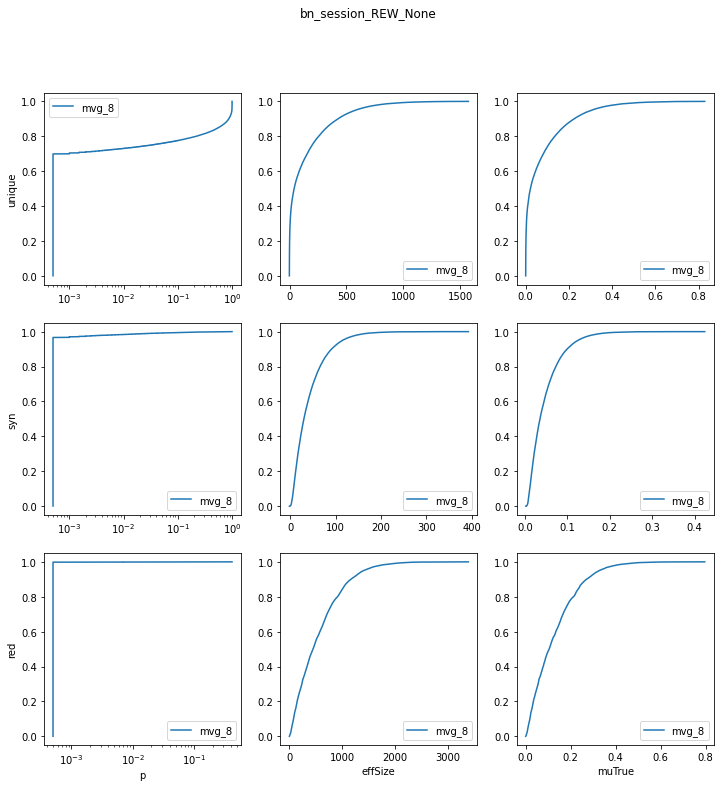

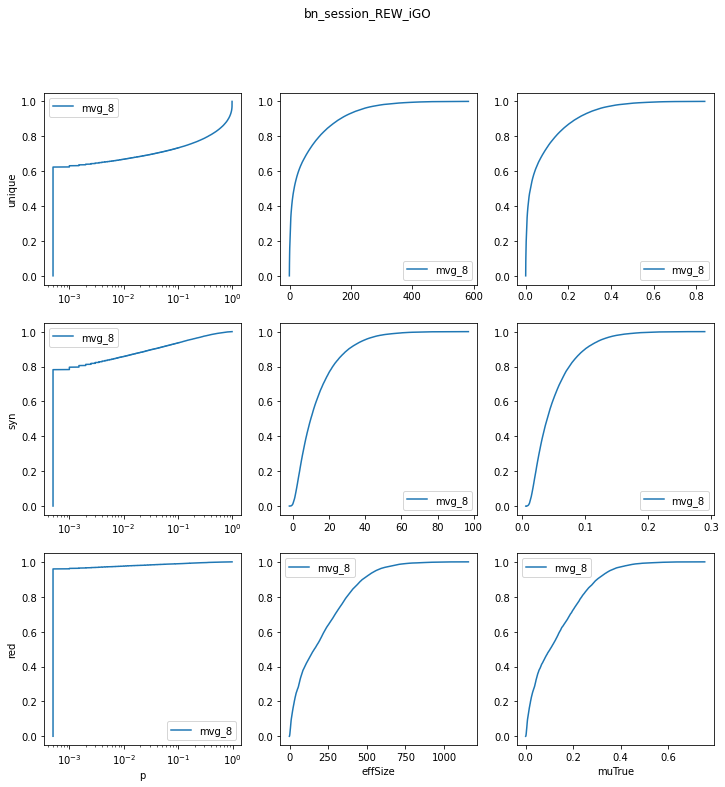

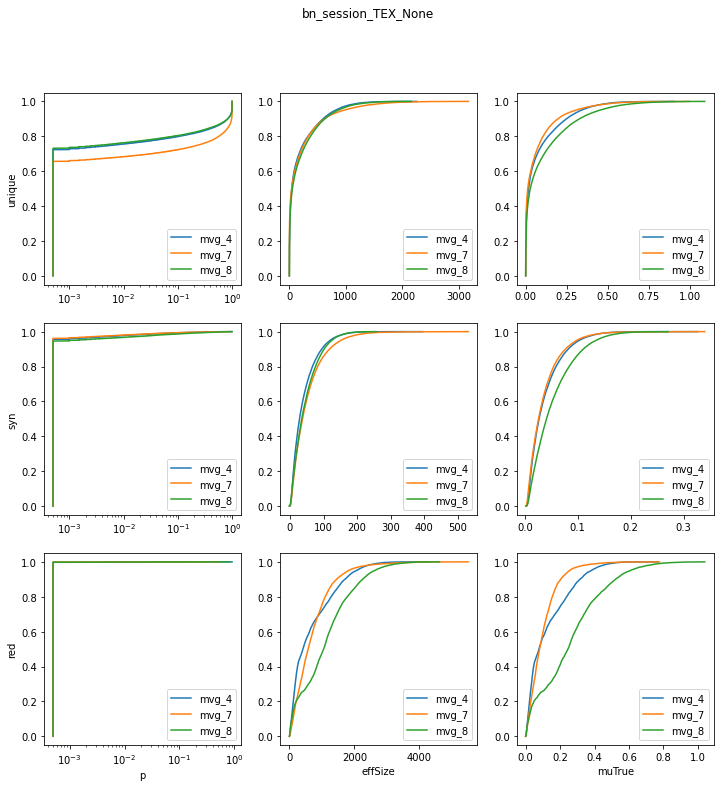

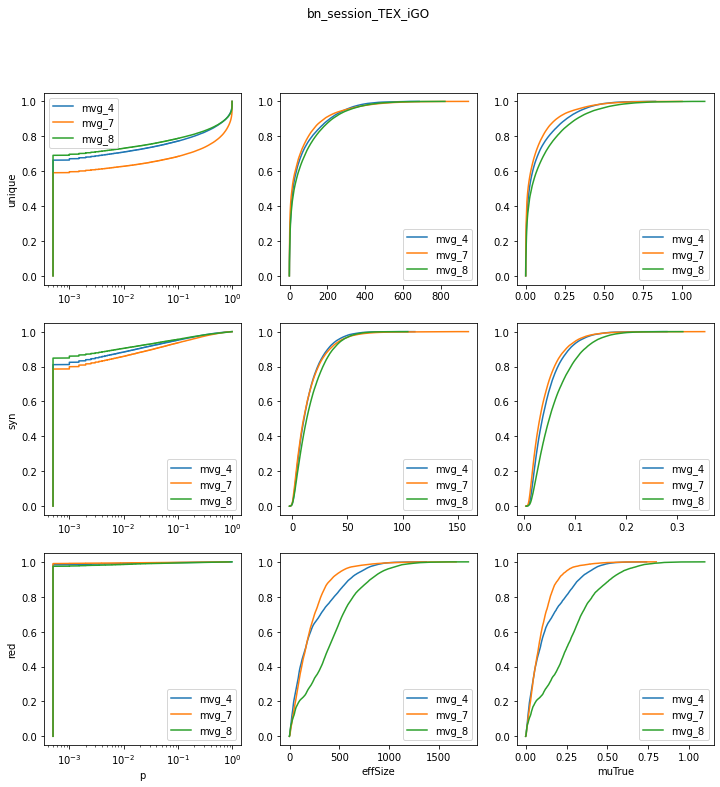

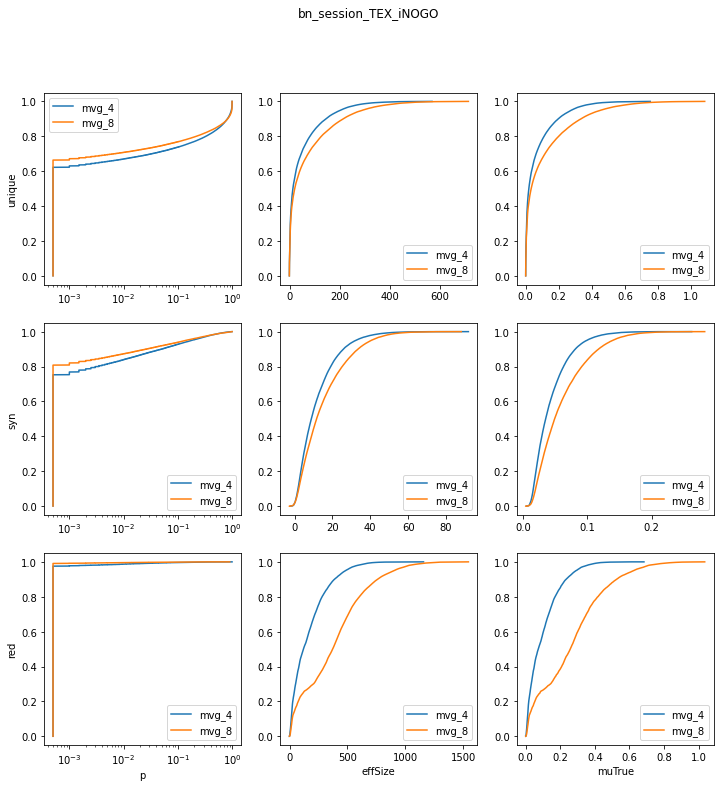

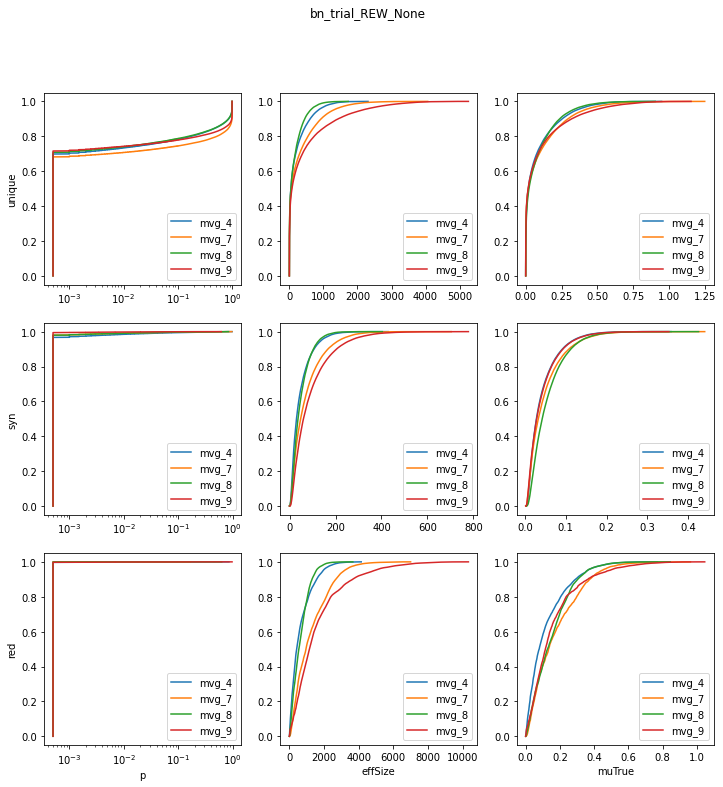

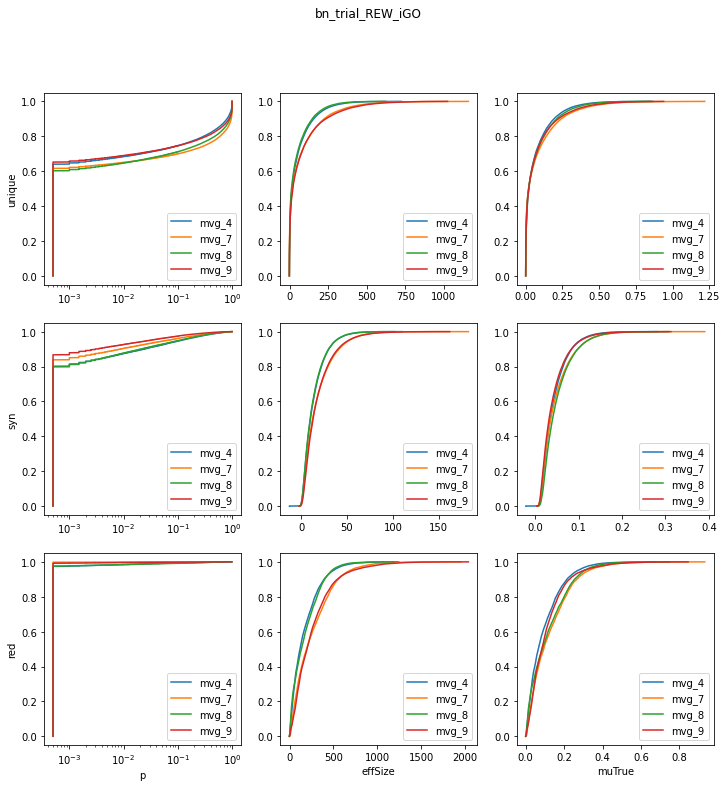

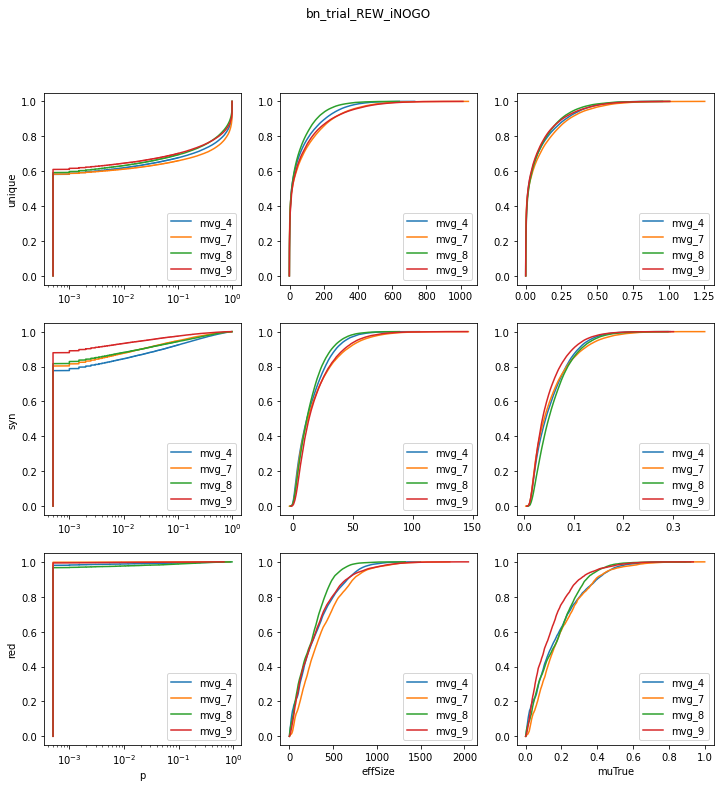

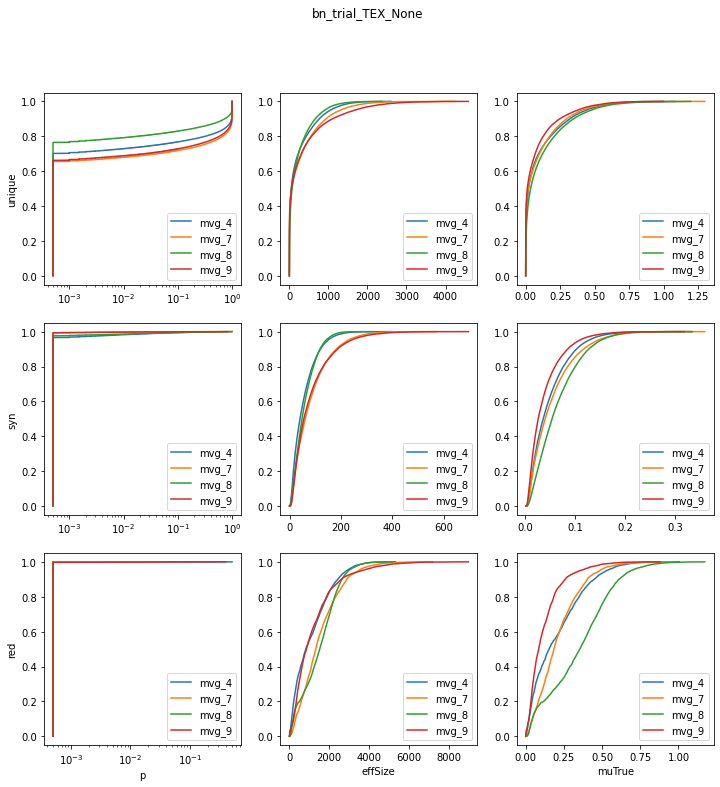

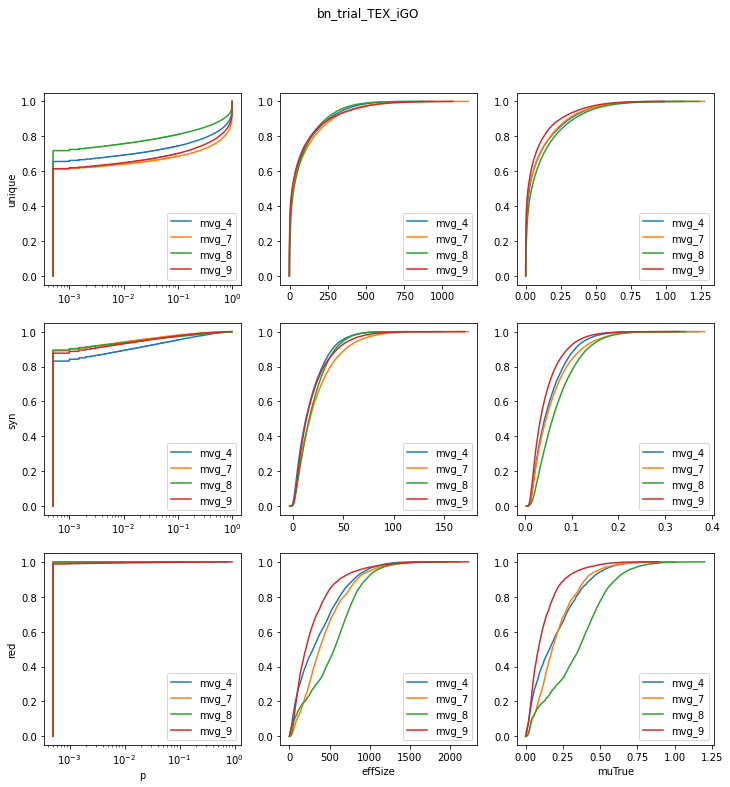

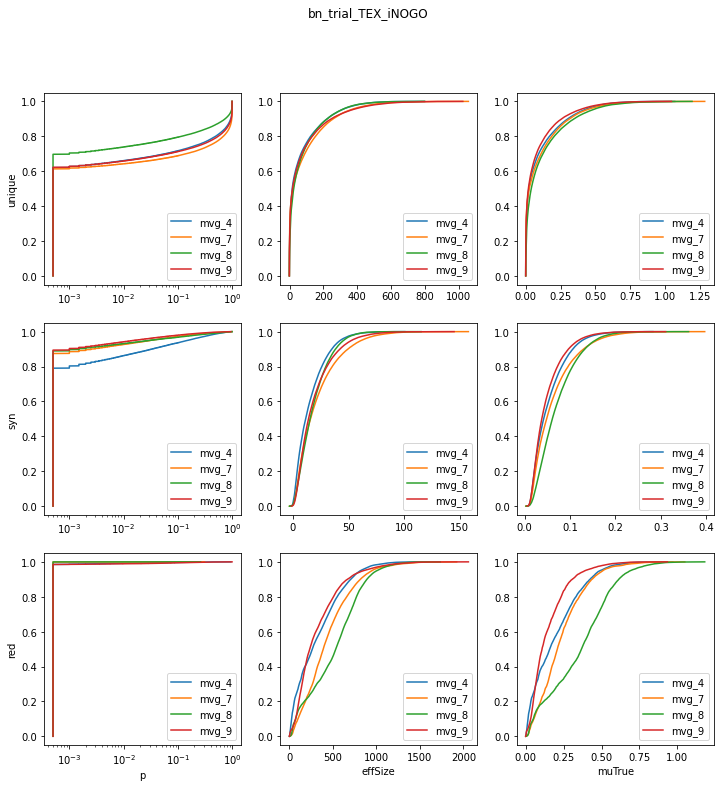

In [10]:
pid_joint.cdfplot(pwdAllH5_2, dfSummary)

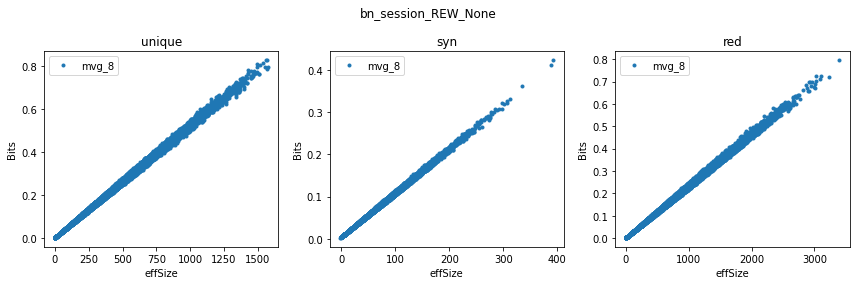

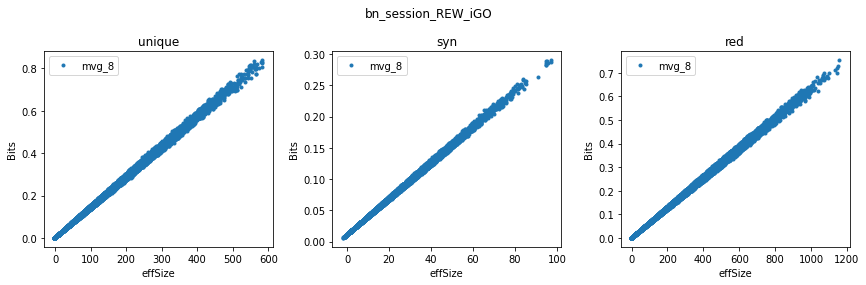

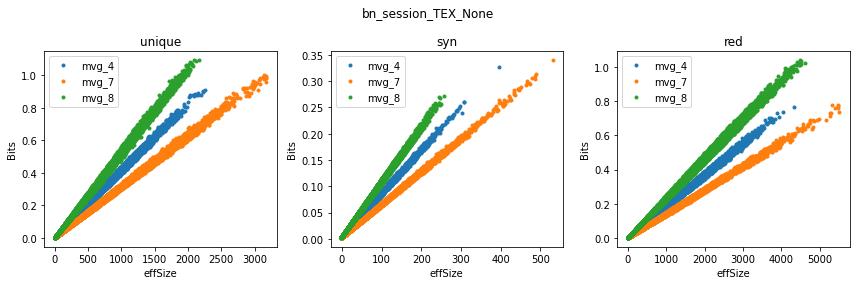

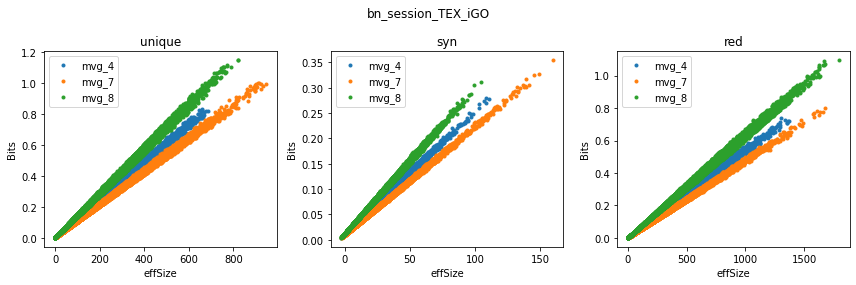

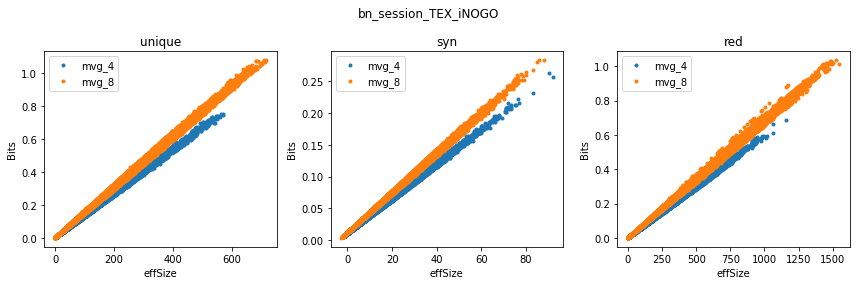

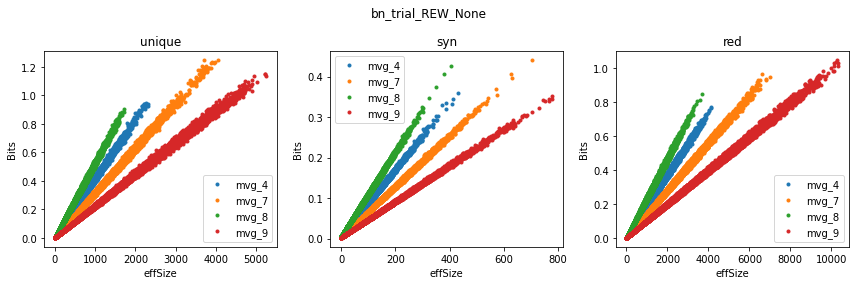

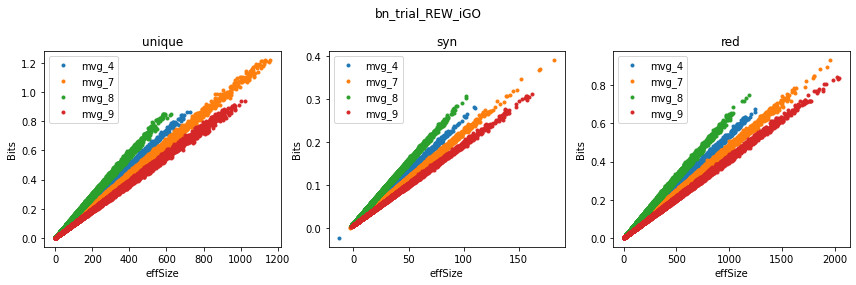

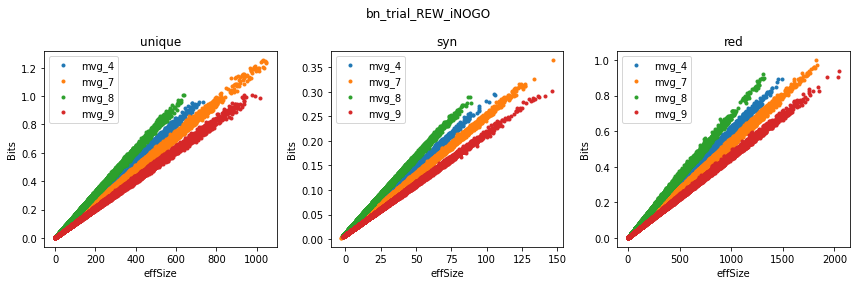

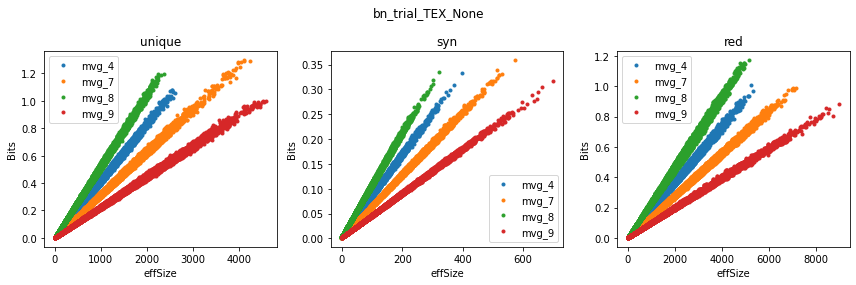

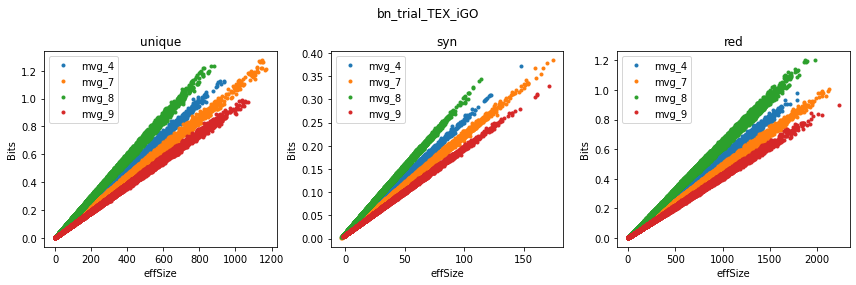

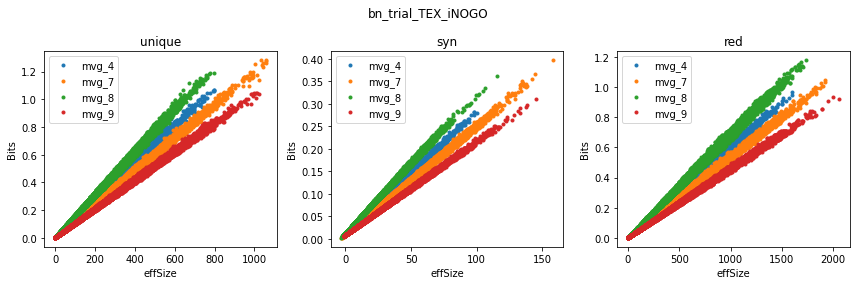

In [16]:
pid_joint.scatter_effsize_bits(pwdAllH5_2, dfSummary)

unique 103776 103776
syn 51888 51888
red 51888 51888


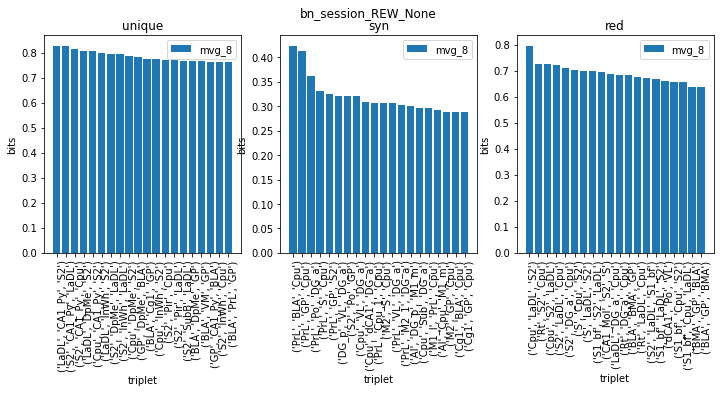

unique 103776 103776
syn 51888 51888
red 51888 51888


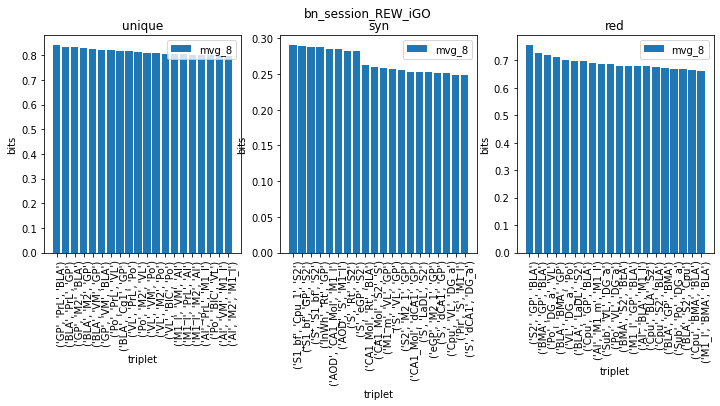

unique 103776 103776
syn 51888 51888
red 51888 51888


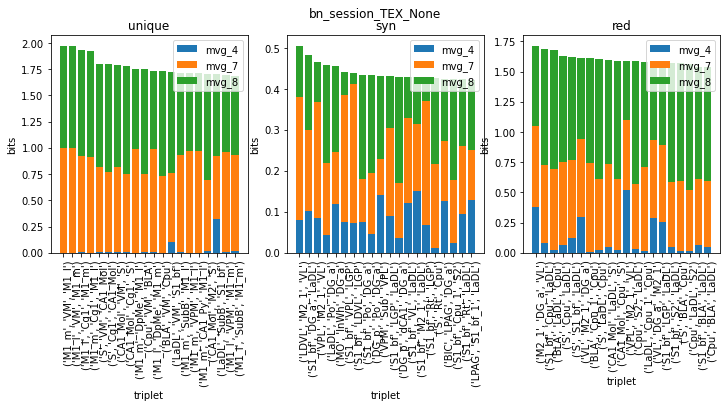

unique 103776 103776
syn 51888 51888
red 51888 51888


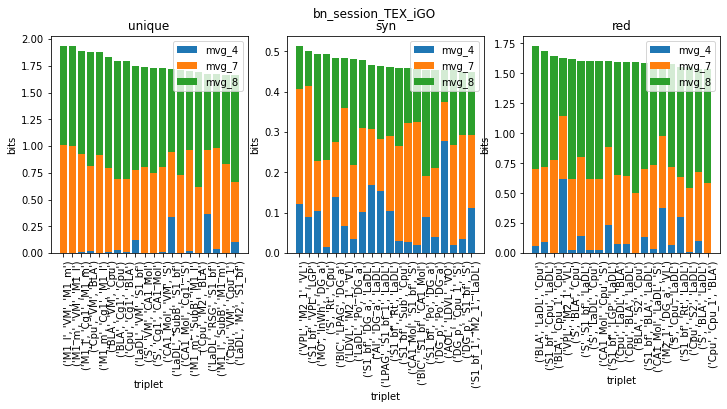

unique 103776 103776
syn 51888 51888
red 51888 51888


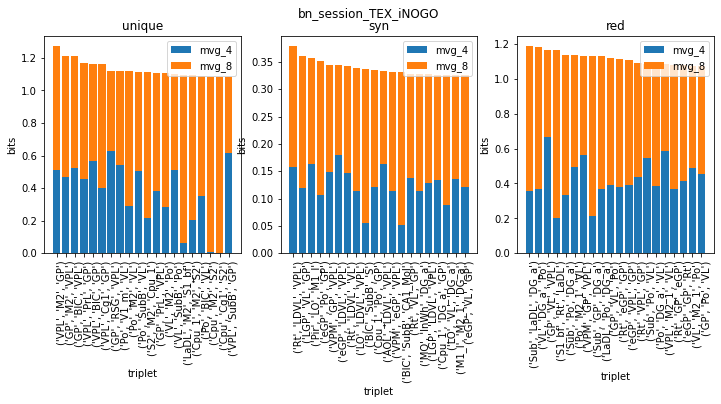

unique 103776 103776
syn 51888 51888
red 51888 51888


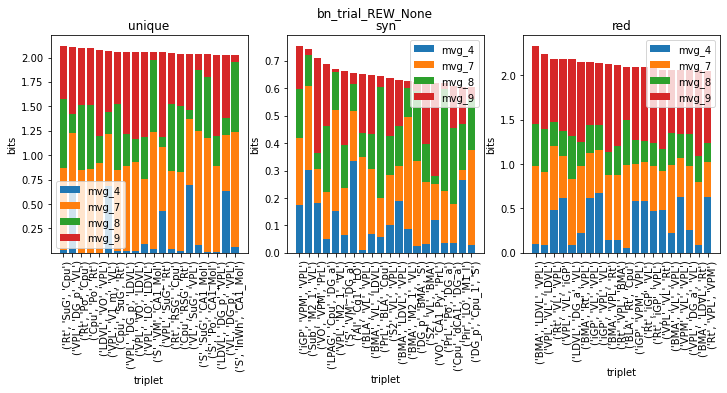

unique 103776 103776
syn 51888 51888
red 51888 51888


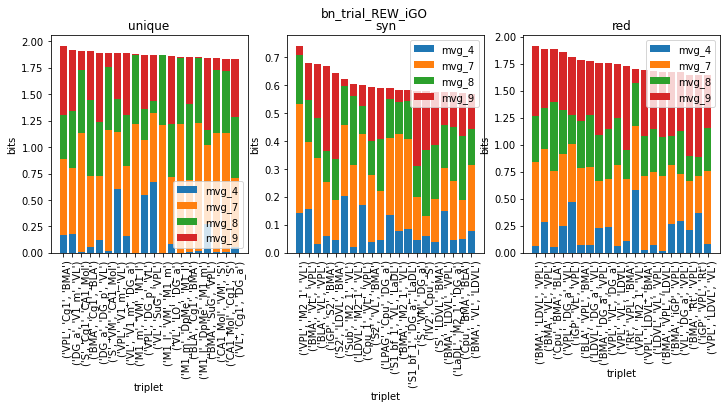

unique 103776 103776
syn 51888 51888
red 51888 51888


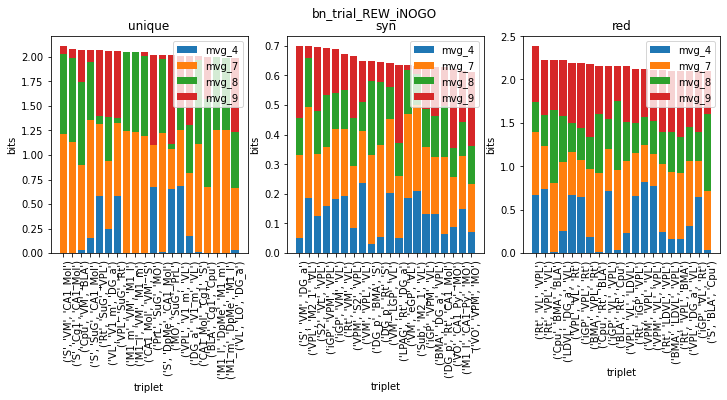

unique 103776 103776
syn 51888 51888
red 51888 51888


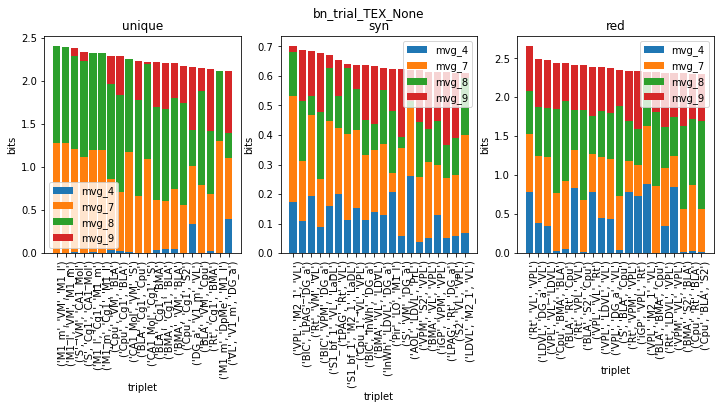

unique 103776 103776
syn 51888 51888
red 51888 51888


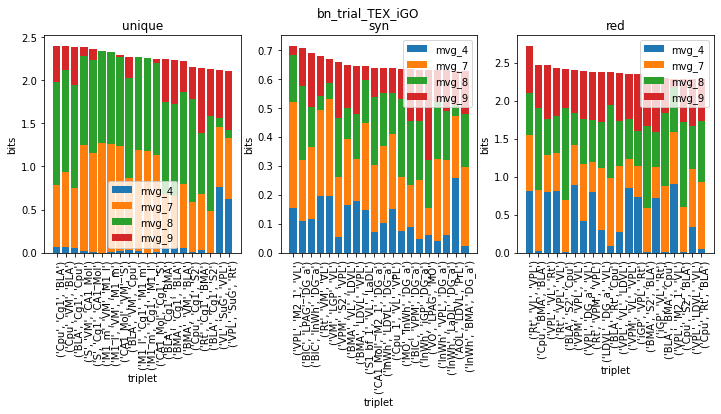

unique 103776 103776
syn 51888 51888
red 51888 51888


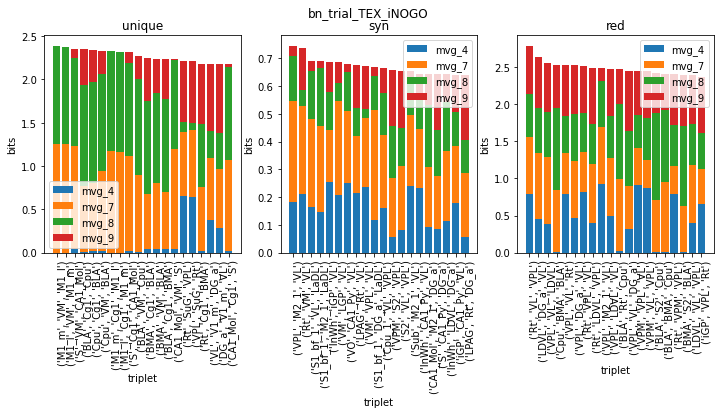

In [84]:
pid_joint.plot_triplets(pwdAllH5_2, dfSummary, nTop=20)